# Aprendizagem Automática Avançada - Assignment 8
# Cláudia Afonso nº 36273 & Rita Rodrigues nº 54859

In [1]:
# Load useful libraries

from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from shap import TreeExplainer
import shap
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer
from sklearn.metrics import classification_report

### Problem 1

**For the following questions, please use the Breast Cancer Wisconsin (Diagnostic) as your dataset. Do not forget to split your data in train and test set. Consider a Random Forest Classifier.**

In [2]:
# Read data set

data = load_breast_cancer(as_frame= True).frame

In [3]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# Separate Features and Target Variables

data_X = data.drop(columns='target')
data_y = data['target']

In [5]:
# Create Train & Test Data

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.25, random_state=60)

In [6]:
# Build the model

rf_clf = RandomForestClassifier(random_state=60)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=60)

In [7]:
# Make prediction on the testing data

y_pred = rf_clf.predict(X_test)

In [8]:
# Evaluating the predictive performance of the model prior to inspecting the importance of the features

print('Accuracy on training set: {:.2f}'.format(rf_clf.score(X_train, y_train)))
print('Accuracy on training set: {:.2f}'.format(rf_clf.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on training set: 0.97


In [9]:
# Classification Report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        52
           1       0.97      0.98      0.97        91

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143



**i) Explain the results obtained by this classifier by considering the Mean Decrease in Impurity (MDI).**

In [10]:
mdi_importances = pd.Series(rf_clf.feature_importances_, index=data_X.columns).sort_values(ascending=True)

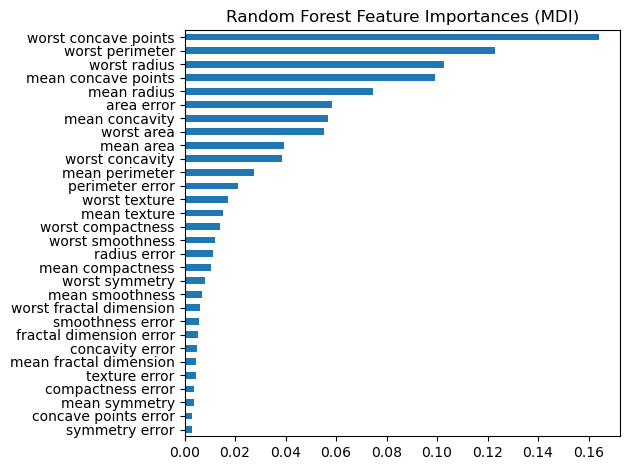

In [11]:
ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()

In [12]:
feature_names = list(data_X.columns)
feature_names_series = pd.Series(feature_names)

mask_more_important = feature_names_series.isin([
    "worst concave points", "worst perimeter", "worst radius", "mean concave points", "mean radius"])

# Use the mask to select the feature importances and compute the sum
mdi_sum_most_important = rf_clf.feature_importances_[mask_more_important].sum()
print('The MDI sum of the 5 most contributing features is {:.3f}'.format(mdi_sum_most_important))

The MDI sum of the 5 most contributing features is 0.563


In [13]:
mask_least_important = feature_names_series.isin([
    "symmetry error", "concave points error", "mean symmetry", "compactness error", "texture error"])

# Use the mask to select the feature importances and compute the sum
mdi_sum_least_important = rf_clf.feature_importances_[mask_least_important].sum()
print('The MDI sum of the 5 least contributing features is {:.3f}'.format(mdi_sum_least_important)) 

The MDI sum of the 5 least contributing features is 0.018


The overall importance of a feature in a random forest classifier refers to the contribution of that feature to the accuracy of the model across all decision trees in the forest. In other words, it reflects the extent to which the feature helps the random forest classifier make correct predictions.

The overall importance of a feature in a random forest classifier can be measured using various techniques, including impurity-based feature importance and permutation feature importance. Impurity-based feature importance is calculated by measuring how much each feature reduces impurity across all decision trees in the forest. In this context, the term Mean Decrease in Impurity (MDI) is often used. Generally, a feature with a higher MDI score is more important than a feature with a lower MDI score. By examining the MDI scores for each feature, it is possible to gain insight into which features are most important for making accurate predictions in the random forest classifier. The impurity-based feature importance ranks the numerical features to be the most important features. The sum of all importances is scaled to 1.

All the 30 features of the dataset are numerical. Out of these 30 features, the 5 features that contributed the most for the generated random forest classifier were (in order of importance): "worst concave points", "worst perimeter", "worst radius", "mean concave points" and "mean radius". The total MDI sum for these 5 features was approximately 0.563. In contrast, the 5 features in the dataset that contributed the least for the generated random forest classifier were (in order of increasing importance): "symmetry error", "concave points error", "mean symmetry", "compactness error" and "texture error". The total MDI sum for these 5 features was approximately 0.018.

**ii) Now consider the Permutation Feature Importance to explain the results obtained. In this
case, compute and compare the results for the train and test sets.**

In [14]:
result_train = permutation_importance(
    rf_clf, X_train, y_train, n_repeats=10, random_state=60, n_jobs=2
)

In [15]:
sorted_importances_idx = result_train.importances_mean.argsort()
importances = pd.DataFrame(
    result_train.importances[sorted_importances_idx].T,
    columns=data_X.columns[sorted_importances_idx],
)

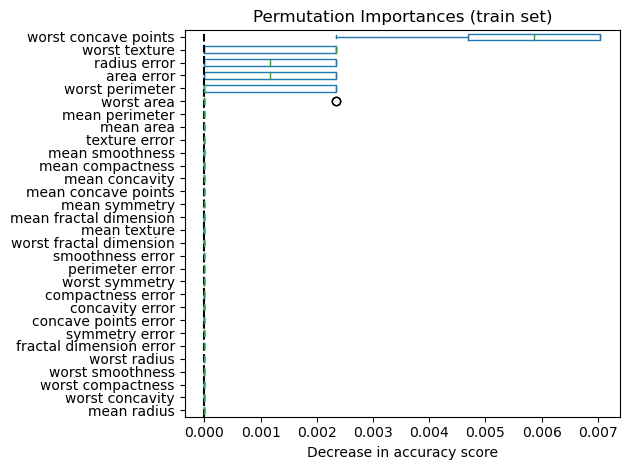

In [16]:
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

Permutation feature importance works by randomly permuting the values of a feature and measuring the resulting decrease in model accuracy. The greater the decrease in accuracy, the more important the feature is considered to be. From the results above, which were obtained using the training set, it is possible to observe that out of the 30 features of the dataset, the 5 features that contributed the most for the generated random forest classifier were: "worst concave points", "worst texture", "radius error", "area error" and "worst perimeter", since these were the ones that displayed the greatest values in "decrease in accuracy score" when permutated. In contrast, several features contributed very little to the generated random forest classifier, since their values for "decrease in accuracy score" are practically 0. These features were: "mean radius", "worst concavity", "worst compactness", "worst radius", "fractal dimension error", "symmetry error", "concave points error", "concavity error", "compactness error", "worst symmetry", "perimeter error", "smoothness error", "worst fractal dimension", "mean texture", "mean fractal dimension", "mean symmetry", "mean concave points", "mean concavity", "mean compactness", "mean smoothness", "texture error", "mean area", "mean perimeter" and "worst area".

In [17]:
result_test = permutation_importance(
    rf_clf, X_test, y_test, n_repeats=10, random_state=60, n_jobs=2
)

In [18]:
sorted_importances_idx = result_test.importances_mean.argsort()
importances = pd.DataFrame(
    result_test.importances[sorted_importances_idx].T,
    columns=data_X.columns[sorted_importances_idx],
)

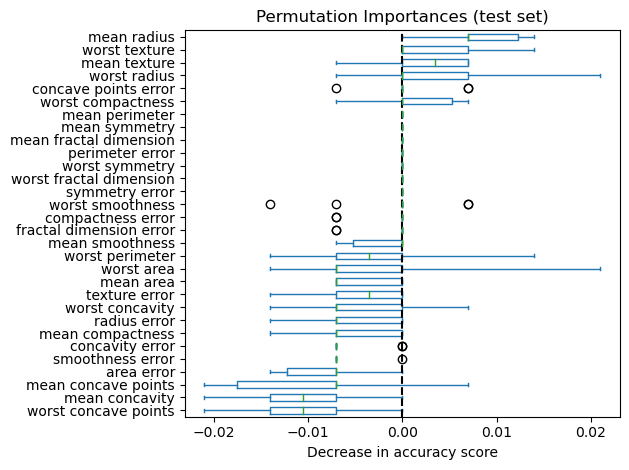

In [19]:
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

It is also possible to compute the permutation importances on the test set. From the results above, it is possible to see that out of the 30 features in the dataset, the 5 features that contributed the most for the generated random forest classifier were: "mean radius", "worst texture", "mean texture", "worst radius" and "worst compactness", since these were the ones that displayed the greatest values in "decrease in accuracy score" when permutated. The feature "worst texture" was also found to be quite relevant in the train set. In contrast, several features contributed very little to the generated random forest classifier in the test set, since the distribution of their values is centered at negative values. These features were: "worst concave points", "mean concavity", "mean concave points", "area error", "smoothness error", "concavity error", "mean compactness", "radius error", "worst concavity", "texture error", "mean area", "worst area", "worst perimeter" and "mean smoothness".

**iii) Can you observe significant differences in the explanatory power in the two previous approaches in the training set?**

As previously mentioned, when considering MDI values the 5 features that contributed the most for the generated random forest classifier were (in order of importance): "worst concave points", "worst perimeter", "worst radius", "mean concave points" and "mean radius". When considering permutation feature importance in the training set, the 5 features that contributed the most for the generated random forest classifier were: "worst concave points", "worst texture", "radius error", "area error" and "worst perimeter". Thus, the features "worst concave points" and "worst perimeter" are common to both approaches, suggesting that indeed these features are indeed important in the generated random forest classifier, regardless of using impurity-based or permutation feature importance methods.

When considering MDI values to determine the 5 features that contributed the least to the random forest classifier, these were: "symmetry error", "concave points error", "mean symmetry", "compactness error" and "texture error". These features, among several others, were also shown to contribute very little to the random forest classifier when considering permutation feature importance in the training set. Thus, regardless of using impurity-based or permutation feature importance methods, the features "symmetry error", "concave points error", "mean symmetry", "compactness error" and "texture error" were found to be unimportant in the generated random forest classifier.

To conclude, we did not observe significant differences in the explanatory power in the two previous approaches in the training set. It is known that impurity-based feature importance for decision trees are strongly biased and favor high cardinality features (typically numerical features) over low cardinality features such as binary features or categorical variables with a small number of possible categories and that permutation-based feature importances do not exhibit such a bias. Thus, the absence of significant differences in the explanatory power of these two approaches might be due to the fact that all features in the used dataset are numerical.

**iv) Use SHAP and LIME to explain the results obtained by the model.**

**SHAP**

In [20]:
# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = TreeExplainer(rf_clf)

"""
Compute shap_values for all of X_test rather instead of a single row, to have more data for plot.
"""
shap_values = explainer.shap_values(X_test)

In [21]:
# Get the feature names

feature_names = list(data_X.columns)

Variable Importance Plot - Global Interpretation


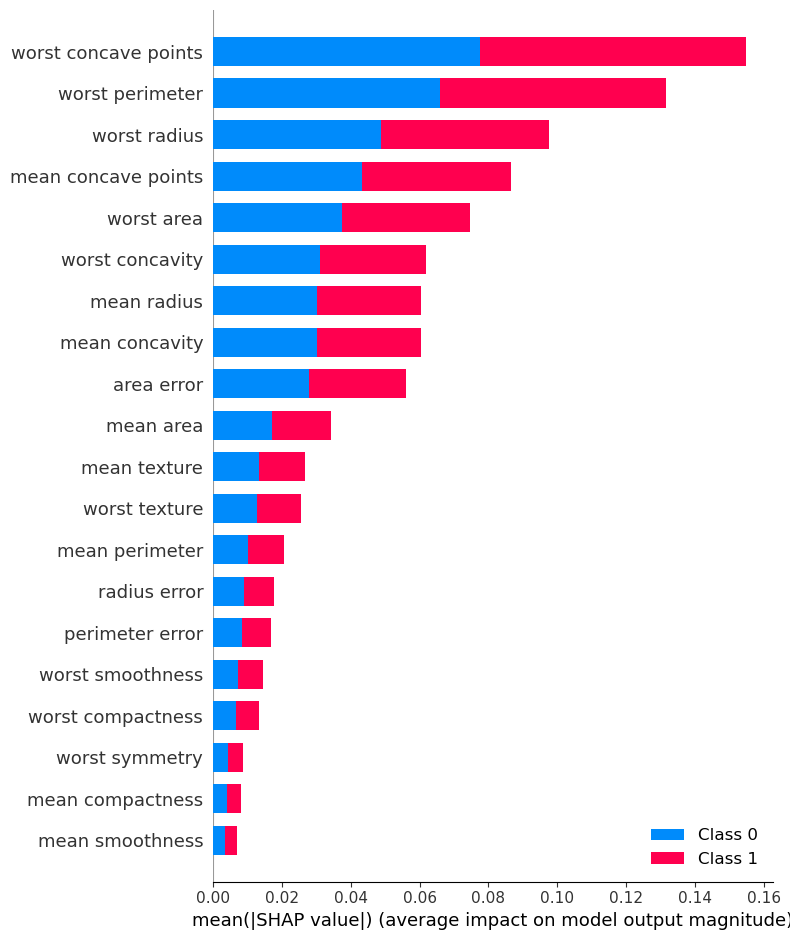

In [22]:
# Representing the Variable Importance Plot

print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test, feature_names)

SHAP (SHapley Additive exPlanations) is a popular method that aims to explain the prediction of an instance/observation by computing the contribution of each feature to the prediction. The previous plot shows the list of important features, from the most significant to the least significant one (top to bottom). Since the blue and red colors associated with each possible class (0 = malignant, 1 = benign) occupy 50% of the bars in the plot, then all the features appear to contribute equally to being diagnosed with malignant or benign breast cancer. The feature "worst concave points" is the one with the most predictive power according to the generated random forest classifier, with "worst perimeter" following behind in the second place. The feature with the lowest predictive power is "mean smoothness".

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


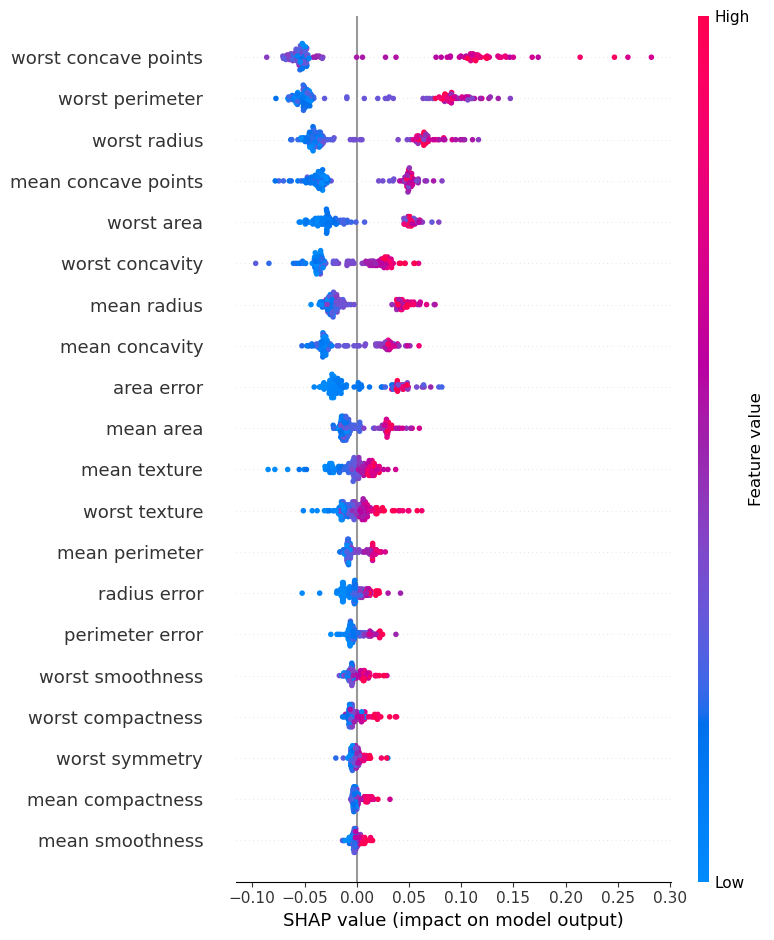

In [23]:
# Summary Plot Deep-Dive for label (target variable) = 0 (malignant)

shap.summary_plot(shap_values[0], X_test, feature_names)

For classification problems, SHAP values exist for each possible label (or class). In our case, we have decided to get that prediction for 0 (malignant).

In the summary plot above, each dot represents the feature value for an individual data instance, with the colors representing whether this feature is a high (red) or low (blue) value. The X-axis displays the positive or negative contribution to the output predicted by the random forest classifier. From the graphical representation above, it is possible to see that most high values (red) have a positive contribution (positive on the X-axis) to the predicted output. In other words, if the value for the "worst concave points" feature of an individual data instance is high, then the probability of being diagnosed with malignant breast cancer (as opposed to benign breast cancer) is high. Thus, it follows that if the value for this feature is low, then the probability of being diagnosed with benign breast cancer (as opposed to malignant breast cancer) is high. The same is true for almost every other feature in the plot, with the exception of "area error", "worst area" and "mean concave points". Here, some mixing of red and blue dots can be seen on the right of the vertical line, which indicates that both high and low values, respectively, for these features can have a positive contribution to the predicted output.

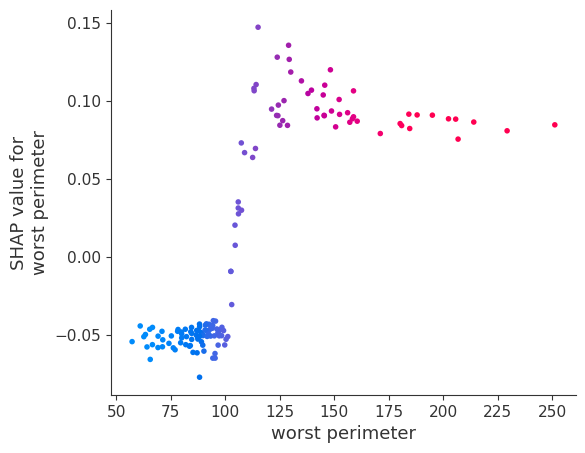

In [24]:
# Dependence Plot on the "Worst Perimeter" feature for label (target variable) = 0 (malignant)

shap.dependence_plot('worst perimeter', shap_values[0], X_test, 
                     feature_names, interaction_index="worst perimeter")

From the dependence plot above, it is possible to observe that patients with values for "worst perimeter" below 110 have a low risk of being diagnosed with malignant breast cancer, whereas those with values above 110 have a higher risk of being diagnosed with malignant breast cancer.

**LIME**

In [25]:
# Get the class names
class_names = [0, 1]

# Get the feature names
feature_names = list(data_X.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer 
explainer = LimeTabularExplainer(X_train.values, feature_names = feature_names, 
                                 class_names = class_names, mode = 'classification')

In [26]:
#Perform the explanation on the 8th instance in the test data
explanation = explainer.explain_instance(X_test.iloc[8], rf_clf.predict_proba)

# show the result of the model's explaination
explanation.show_in_notebook(show_table = True, show_all = False)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


The LIME output kept disappearing when closing the Jupyter notebook. Thus, a screenshot of this output was taken and placed here as an image for future reference in case it happens again.

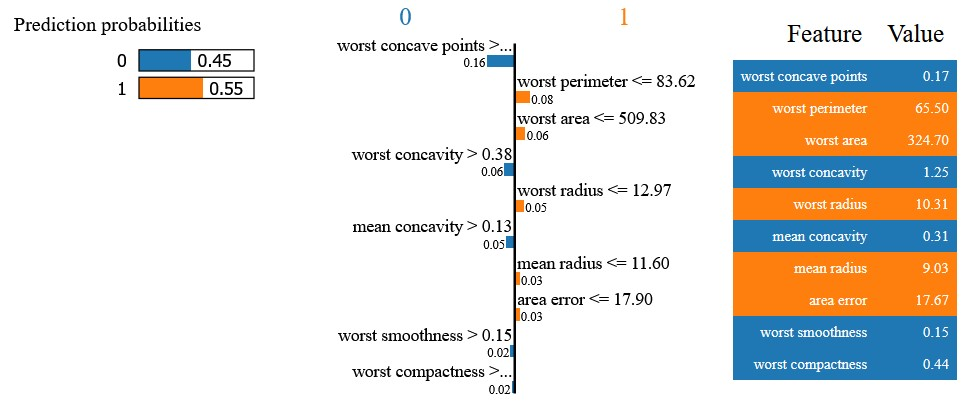

The model predicts this particular patient to have benign breast cancer with 55% of confidence and explains the prediction because the "worst perimeter" is lower than 83.62 (the value for this patient is 65.50), the "worst area" is lower than 509.83 (the value for this patient is 324.70), the "worst radius" is lower than 12.97 (the value for this patient is 10.31), the "mean radius" is lower than 11.60 (the value for this patient is 9.03) and the "area error" is lower than 17.90 (the value for this patient is 17.67). The real features' values for the patient are shown on the right.